In this tutorial we analyse 5k PBMC cells produced using 10x Genomics. The data is publicly available on their website.
To download the data you just need to un-comment the cells below

downloading 10x PBMC data
----------------------------------------

https://www.10xgenomics.com/resources/datasets/5-k-peripheral-blood-mononuclear-cells-pbm-cs-from-a-healthy-donor-next-gem-v-1-1-1-1-standard-2-0-0

In [1]:
#!wget https://cf.10xgenomics.com/samples/cell-atac/2.0.0/atac_pbmc_5k_nextgem/atac_pbmc_5k_nextgem_filtered_peak_bc_matrix.h5
#!wget https://cf.10xgenomics.com/samples/cell-atac/2.0.0/atac_pbmc_5k_nextgem/atac_pbmc_5k_nextgem_fragments.tsv.gz
#!wget https://cf.10xgenomics.com/samples/cell-atac/2.0.0/atac_pbmc_5k_nextgem/atac_pbmc_5k_nextgem_fragments.tsv.gz.tbi

downloading gtf file from gencode
----------------------------------------

https://www.gencodegenes.org/human/

In [2]:
#!wget http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gtf.gz

# Loading Libraries


In [2]:
#!pip install git+https://github.com/colomemaria/epiScanpy.git@tss_enrichment
#!pip install git+https://github.com/colomemaria/epiScanpy

In [1]:
import episcanpy as epi

In [2]:
# settings for the plots
epi.set_figure_params(scanpy=True, dpi=80, dpi_save=800,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

# Loading the ATAC data as Anndata

In [3]:
adata = epi.read_h5_atac("./atac_pbmc_5k_nextgem_filtered_peak_bc_matrix.h5")
adata

AnnData object with n_obs × n_vars = 4623 × 135377
    var: 'name'
    uns: 'omic'

In [4]:
# save the raw read count information in a layer
adata.layers['counts'] = adata.X

# binarize the count matrix to only have open peak = 1 and closed peak = 0 
epi.pp.binarize(adata)

### preliminary filtering 
removing very lowly covered cells and features before running QC and a more detailed filtering

In [5]:
#filter out cell barcodes containing less than 10 peaks
epi.pp.filter_cells(adata, min_features=10)
adata

AnnData object with n_obs × n_vars = 4623 × 135377
    obs: 'nb_features'
    var: 'name'
    uns: 'omic'
    layers: 'counts'

In [6]:
# filter out peaks open in less than 2 cells
epi.pp.filter_features(adata, min_cells=2)
adata

AnnData object with n_obs × n_vars = 4623 × 135363
    obs: 'nb_features'
    var: 'name', 'n_cells'
    uns: 'omic'
    layers: 'counts'

# Quality Controls 

## - TSS enrichment 

In [ ]:
# TSS enrichment & find genes 
epi.pp.tss_enrichment(adata, 
                      gtf="./gencode.v38.annotation.gtf.gz",
                      fragments="./atac_pbmc_5k_nextgem_fragments.tsv.gz")

In [ ]:
adata

In [ ]:
# visualisation of the TSS enrichment metric
epi.pl.tss_enrichment(adata)

In [ ]:
epi.pl.tss_enrichment_score(adata)

In [14]:
# split cells between high TSS enrichment and low TSS enrichment scores. 
epi.tl.filter_enrichment_score(adata, score_threshold=8)

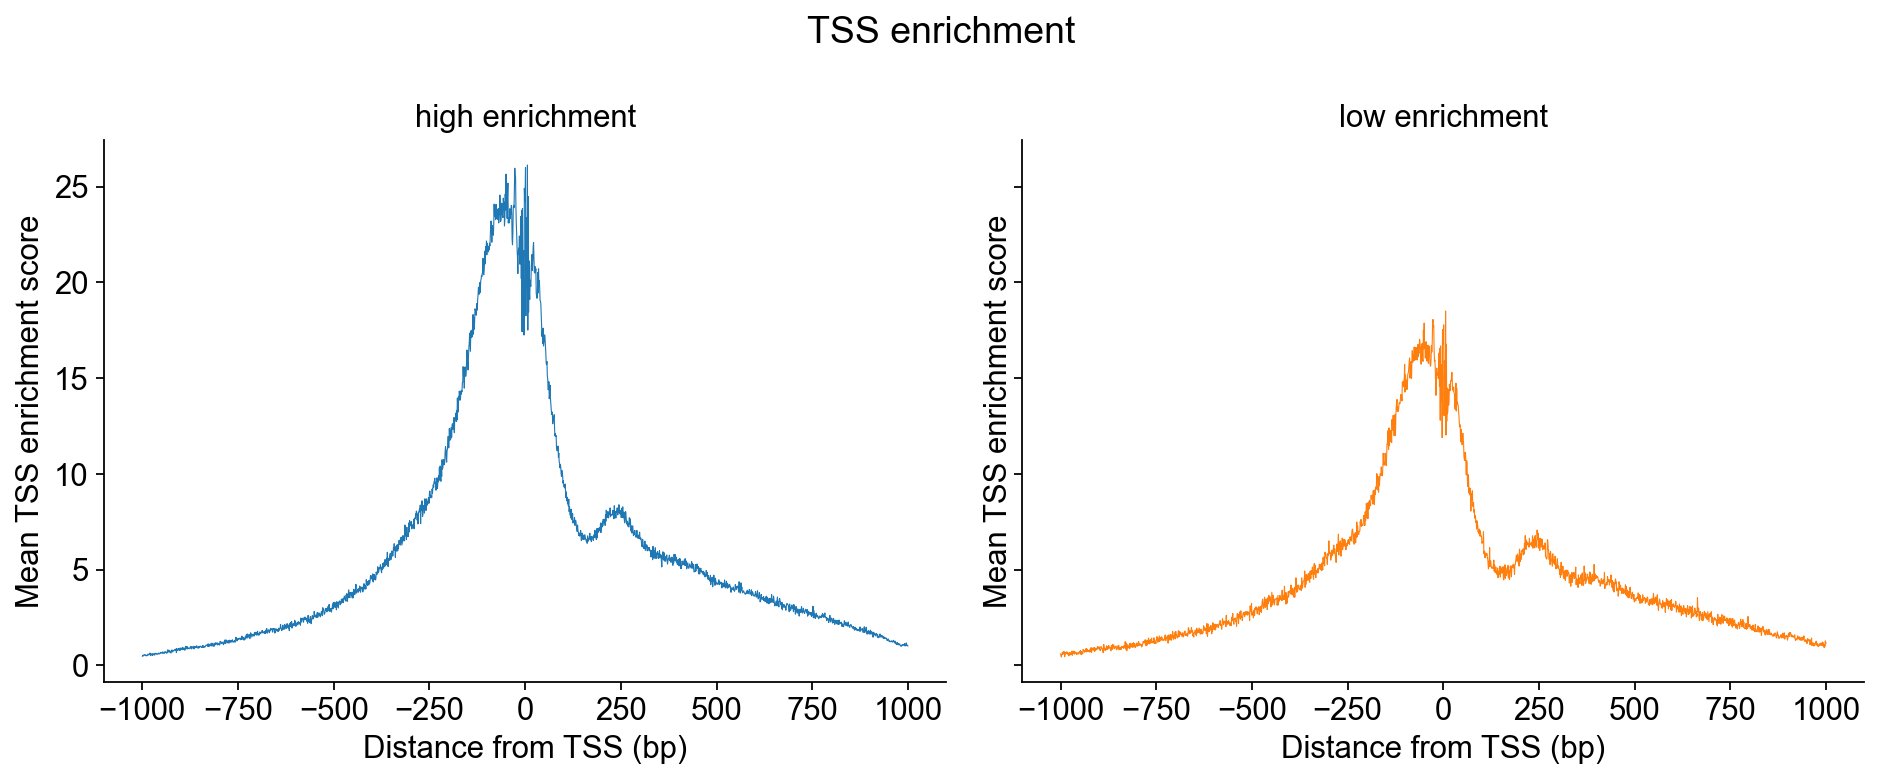

In [16]:
epi.pl.tss_enrichment(adata, group_by='tss_enrichment_split')

In [ ]:
- 

# Latent semantic Indexing

In [19]:
epi.pp.tfidf(adata)
epi.pp.lsi(adata)
epi.pp.neighbors(adata, use_rep='X_lsi')
epi.tl.umap(adata)

... storing 'tss_enrichment_split' as categorical


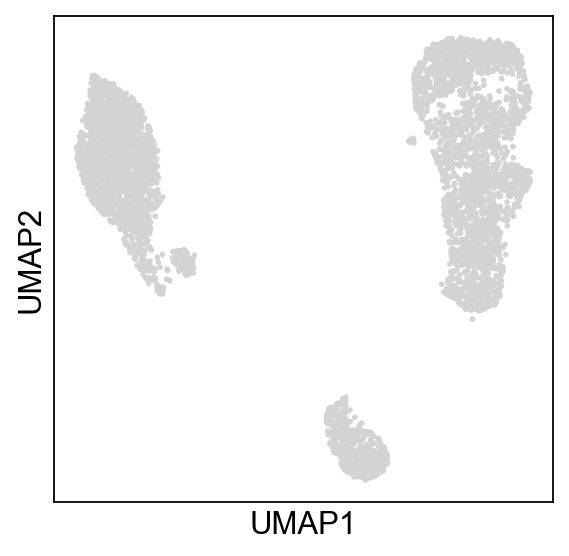

In [21]:
epi.pl.umap(adata)

In [30]:
epi.tl.louvain(adata)

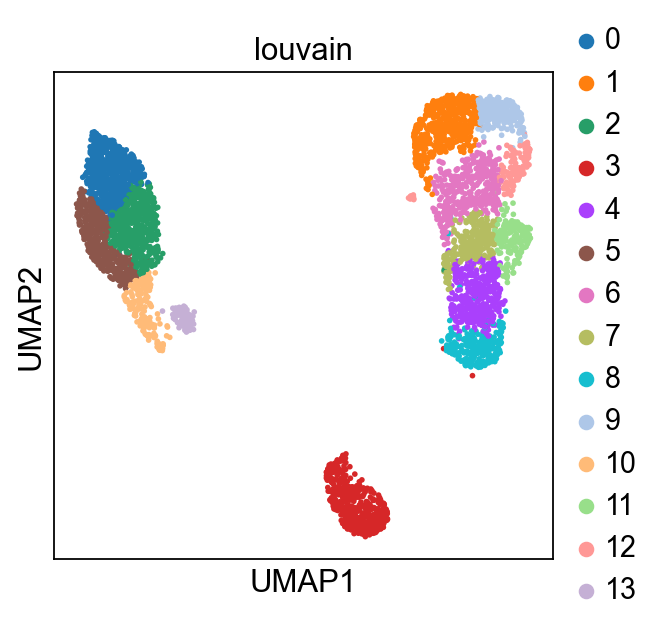

In [31]:
epi.pl.umap(adata, color='louvain')

In [29]:
!pip install louvain

  Using cached louvain-0.7.0-cp38-cp38-macosx_10_9_x86_64.whl (736 kB)


In [ ]:
python-igraph
louvain

In [34]:
epi.pp.pca(adata)
epi.tl.tsne(adata)